In [3]:
# Tratamiento de datos
# -----------------------------------------------------------------------
import pandas as pd
import numpy as np

# Visualizaciones
# -----------------------------------------------------------------------
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import tree

# Para realizar la regresión lineal y la evaluación del modelo
# -----------------------------------------------------------------------
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor, plot_tree
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error


from sklearn.model_selection import KFold,LeaveOneOut, cross_val_score


from sklearn.preprocessing import StandardScaler

from tqdm import tqdm


# Ignorar los warnings
# -----------------------------------------------------------------------
import warnings
warnings.filterwarnings('ignore')

In [6]:
df = pd.read_csv("../datos/online_shoppers_intention_clase_nonulls_estan_sinout_encoding.csv", index_col=0)
X = df.drop(columns="PageValues")
y = df[["PageValues"]]

In [7]:
modelo_lineal = LinearRegression()

In [9]:
kf = KFold(n_splits=5,
           random_state=42,
           shuffle=True)

scores_r2 = cross_val_score(modelo_lineal,
                            X=X,
                            y=y,
                            cv=kf,
                            scoring="neg_root_mean_squared_error")

scores_r2

array([-16.29601923, -14.87972702, -15.37901506, -17.4707936 ,
       -15.83382337])

In [ ]:
loo = LeaveOneOut()
scores = []

for indice in range(df.shape[0]):
    X_train_cv = X.drop(index=indice)
    y_train_cv = y.drop(index=indice)
    X_test_cv = X.iloc[[indice]]
    y_test_cv = y.iloc[[indice]]

    modelo_lineal.fit(X_train_cv, y_train_cv)
    modelo_lineal.predict(X_test_cv)

    

In [19]:
df.describe()

,AdministrativeDuration,Informational,InformationalDuration,ProductRelatedDuration,ExitRates,PageValues,Administrative_knn,ProductRelated_knn,BounceRates_knn,VisitorType,OperatingSystems,Browser,Region,Month,TrafficType
count,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000
mean,0.778943,0.326034,15.314959,0.283214,0.501974,5.028812,0.261998,0.264718,1.001041,1.748581,2.572587,5.007791,5.026581,5.025773,5.020296
std,1.992103,0.849792,58.458028,0.936318,1.344439,16.413764,0.720523,0.950898,2.649134,0.658283,0.889258,1.299966,1.068103,1.124185,2.269724
min,-0.028789,0.000000,0.000000,-0.467912,-0.704379,0.000000,-0.263158,-0.600000,-0.221550,0.000000,0.000000,0.000000,2.737270,0.759746,0.000000
25%,-0.028789,0.000000,0.000000,-0.322270,-0.288277,0.000000,-0.263158,-0.366667,-0.221550,2.000000,2.000000,4.740534,4.757728,4.830300,3.044277
50%,-0.009715,0.000000,0.000000,-0.035757,0.030340,0.000000,0.000000,-0.033333,-0.007836,2.000000,2.000000,4.788621,4.820688,5.184318,5.125548
75%,0.803375,0.000000,0.000000,0.517768,0.695621,0.000000,0.526316,0.500000,0.752039,2.000000,3.000000,5.019744,5.219882,5.693590,6.891499
max,36.362048,7.000000,861.000000,9.812138,4.895621,361.763742,5.789474,8.800000,11.461524,2.000000,5.000000,24.360064,10.106214,7.536151,15.053237


<Axes: ylabel='Frequency'>

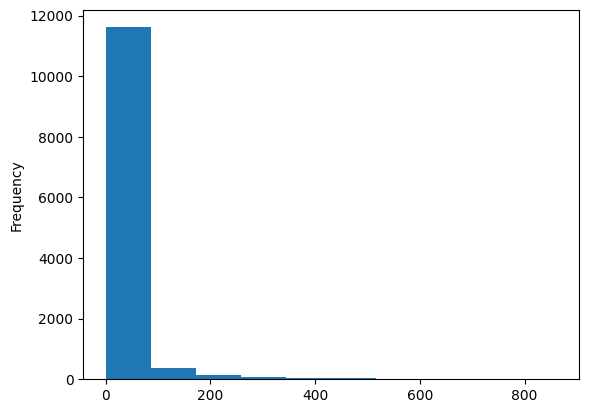

In [20]:
df["InformationalDuration"].plot.hist()